In [2]:
# импортируем пандас
import pandas as pd

# чтение данных
df = pd.read_csv('cookie_cats.csv')

# Показаны первые несколько строк
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [3]:
#Подсчет количества игроков в каждой группе AB.
df.groupby('version')['version'].count()


version
gate_30    44700
gate_40    45489
Name: version, dtype: int64

In [4]:
plot_df = df.groupby('sum_gamerounds').count().reset_index()
plot_df.head()

,sum_gamerounds,userid,version,retention_1,retention_7
0,0,3994,3994,3994,3994
1,1,5538,5538,5538,5538
2,2,4606,4606,4606,4606
3,3,3958,3958,3958,3958
4,4,3629,3629,3629,3629


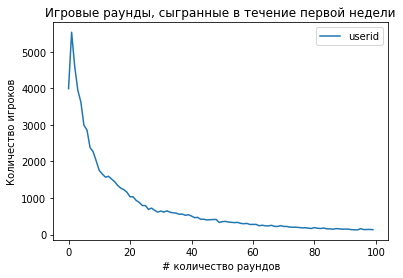

In [15]:
# Эта команда приводит к отображению графиков в записной книжке
%matplotlib inline

# Подсчет количества игроков для каждого количества игровых раундов
plot_df = df.groupby('sum_gamerounds').count().reset_index()

# Построение графика распределения игроков, сыгравших от 0 до 100 игровых раундов
ax = plot_df.head(n=100).plot('sum_gamerounds', 'userid')
ax.set_xlabel("# количество раундов")
ax.set_ylabel("Количество игроков")
ax.set_title("Игровые раунды, сыгранные в течение первой недели");

In [6]:
# % пользователей, которые вернулись на следующий день после установки
df['retention_1'].mean()

0.4452095044850259

In [7]:
# Расчет 1-дневного срока хранения для каждой AB-группы
df.groupby('version')['retention_1'].mean()

version
gate_30    0.448188
gate_40    0.442283
Name: retention_1, dtype: float64

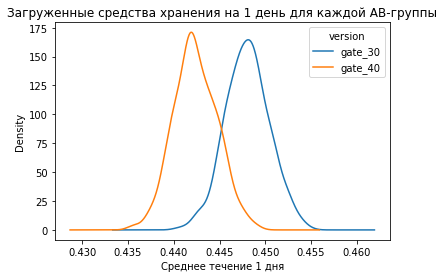

In [17]:
# Создание списка с загрузочными средствами для каждой AB-группы
boot_1d = []
iterations=500
for i in range(iterations):
    boot_mean = df.sample(frac=1, replace=True).groupby(
        'version')['retention_1'].mean()
    boot_1d.append(boot_mean)
    
# Преобразование списка во фрейм данных
boot_1d = pd.DataFrame(boot_1d)
    
# График оценки плотности ядра для распределений начальной загрузки
ax = boot_1d.plot.kde()
ax.set_title('Загруженные средства хранения на 1 день для каждой AB-группы')
ax.set_xlabel('Среднее течение 1 дня');

In [9]:
# проверка первых нескольких строк boot_1d
boot_1d.head()

version,gate_30,gate_40
retention_1,0.447966,0.444699
retention_1,0.447870,0.440228
retention_1,0.446663,0.442010
retention_1,0.451515,0.441320
retention_1,0.447275,0.446322


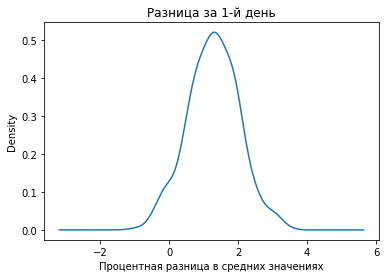

In [19]:
# Добавление столбца с разницей в % между двумя AB-группами
boot_1d['diff'] = ((boot_1d.gate_30 - boot_1d.gate_40)
                   / boot_1d.gate_40 * 100)

# Построение графика разницы в % от начальной загрузки
ax = boot_1d['diff'].plot.kde()
ax.set_xlabel('Процентная разница в средних значениях')
ax.set_title('Разница за 1-й день');

In [11]:
# Вычисление вероятности того, что удержание в течение 1 дня будет больше, когда врата находятся на уровне 30
prob = (boot_1d['diff'] > 0).sum() / len(boot_1d['diff'])
# or prob = (boot_1d['diff'] > 0).mean()

# Довольно высокая вероятность
'{0:.1%}'.format(prob)

'97.0%'

In [12]:
# Расчет 7-дневного срока хранения для обеих AB-групп
df.groupby('version')['retention_7'].mean()

version
gate_30    0.190201
gate_40    0.182000
Name: retention_7, dtype: float64

'100.0%'

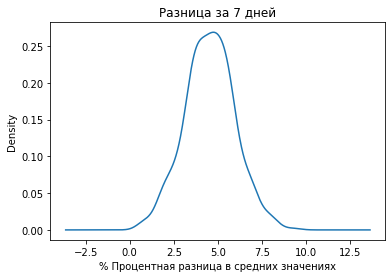

In [20]:
# Создание списка с загрузочными средствами для каждой AB-группы
boot_7d = []
for i in range(500):
    boot_mean = df.sample(frac=1, replace=True).groupby(
        'version')['retention_7'].mean()
    boot_7d.append(boot_mean)
    
# Преобразование списка во фрейм данных
boot_7d = pd.DataFrame(boot_7d)

# Добавление столбца с разницей в % между двумя AB-группами
boot_7d['diff'] = ((boot_7d['gate_30'] - boot_7d['gate_40']) / 
                   boot_7d['gate_40'] * 100)

#Построение графика разницы в % от начальной загрузки
ax = boot_7d['diff'].plot.kde()
ax.set_xlabel("% Процентная разница в средних значениях")
ax.set_title('Разница за 7 дней');

# Вычисление вероятности того, что 7-дневное удержание будет больше, когда врата находятся на уровне 30
prob = (boot_7d['diff'] > 0).mean()

# Довольно высокая вероятность
'{0:.1%}'.format(prob)

In [21]:
# Итак, учитывая данные и анализ начальной загрузки
# Должны ли мы переместить врата с 30-го уровня на 40-й?
move_to_level_40 = False

# Результаты прогрнозирования

## Переносить Ворота с 30-го уровня на 40-й нежелательно
## в связи с падаением популярности игрового процесса